In [8]:
import opendssdirect as dss
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from utils import spectral_analysis,make_sens_ts,make_deviations

In [5]:
sns.set_context("paper")
plt.style.use("bmh")
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath,amssymb}')
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['legend.fontsize'] = 7
matplotlib.rcParams['lines.linewidth'] = 1

In [16]:
path = "/home/sam/github/PowerSensitivities.jl/data/ieee123_ts/123Bus/IEEE123Master.dss"
dss.run_command("compile "+path)

''

NameError: name 'submatrices' is not defined

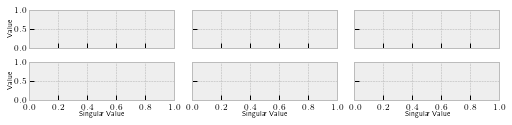

In [22]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(2*3.5,0.75*(3.5/1.61828)),constrained_layout=True,sharex=True,sharey=True)
axes[1,0].set_xlabel("Singular Value",fontsize=7,labelpad=0.25)
axes[1,1].set_xlabel("Singular Value",fontsize=7,labelpad=0.25)
axes[1,2].set_xlabel("Singular Value",fontsize=7,labelpad=0.25)
axes[0,0].set_ylabel("Value",fontsize=7,labelpad=0.25)
axes[1,0].set_ylabel("Value",fontsize=7,labelpad=0.25)

colors = ['crimson','teal','goldenrod']
styles = ['o','s']
#Spectral analysis by phase and injection typeobservabilityobservability
for i,(inj_type,phase_submatrices) in enumerate(submatrices.items()):
    for j,(phase,submatrix) in enumerate(phase_submatrices.items()):
        cum_sigma,normed_sigma = matcom.spectral_analysis(submatrix)
        singular_value_ixs = [i for i in range(len(cum_sigma))]
        #Plot styling
        style = styles[i]
        color= colors[j]
        axes[i,j].plot(singular_value_ixs,cum_sigma,':',marker=style,markersize=2,alpha=0.6,color=color,label='Cumulative Normalized',rasterized=True)
        axes[i,j].plot(singular_value_ixs,normed_sigma,'-',marker=style,markersize=2,alpha=0.6,color=color,label='Normalized',rasterized=True)
        axes[i,j].fill_between(singular_value_ixs, normed_sigma,alpha=0.25,rasterized=True)
        axes[i,j].fill_between(singular_value_ixs, cum_sigma,alpha=0.15,rasterized=True)
        axes[i,j].set_title(inj_type + ' Sensitivities: ' +'Phase '+phase,fontsize=7)
        #axes[i,j].semargins(x=0.25,y=0.25)
        #axes[i,j].grid()
       # axes[i,j].ticks_on()
        axes[i,j].tick_params(axis='both',which='major',pad=0.8)
        axes[i,j].minorticks_on()
        axes[i,j].legend(fontsize=5,frameon=False)
#plt.savefig("/home/sam/github/jacobian_discovery/Figures/phase_spectral_r4.pdf",dpi=400)